This is the Juypter Notebook for Joe McGrath's submission for the Udacity Machine Learning Engineer nanodegree program.
This file contains the relevant code-blocks, assiocated comments and visual aids to be used in conjunction with the written PDF piece.


In [1]:
#Intro code cell, in here the required libaries will be imported
#Comments etc.
#Data imported, results from other models saved for future reference
import numpy as np
import pandas as pd
from sklearn import preprocessing
import time
import matplotlib.pyplot as plt
#import visuals as vs
%matplotlib inline
#Plotting libaries
#Machine Learning libaries 
from sklearn.model_selection import train_test_split


In [45]:
#Additional code block for defining functions
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score,mean_squared_error,r2_score
#mean_squared_error(y_true,y_pred)
#explained_variance_score(y_true,y_pred)

# Training func
def trainer(train,res,model,add):
    #Note start time
    st=time.time()
    if 0<len(add):
        model.fit(train,res, add)
    else:
        model.fit(train,res, add)
    #Note time taken to train model
    timeTaken=time.time()-st
    print("Time taken to fit model - "+str(timeTaken))
    return model

# Performance Metric
def performance_metric(y_true, y_predict):
    #Running the performance metrics on the results and predicitions
    Rscore = r2_score(y_true, y_predict)
    mse=mean_squared_error(y_predict,y_true)
    print("R^2 Score is "+str(Rscore))
    print("MSE Score is "+str(mse))

# Testing func
def testFunc(results, inputData, model):
    #Note start time
    st=time.time()
    predicts = model.predict(inputData)
    #Note time taken to test model
    timeTaken =time.time()-st
    print("Time taken to predict results - "+str(timeTaken))
    performance_metric(results, predicts)

In [27]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('data/train.csv')
data = pd.DataFrame(data)

#Summary statistics
#Target variables
#Double [[]] wrapping ensure stays as pandas dataframe
targData=data[['critical_temp']]
#Feature variables
#Dropping the target variables from the data-set
featData=data.drop(['critical_temp'],axis=1)
##Such that we are left with only the extracted features from the material properties
featData=featData.drop(['number_of_elements'],axis=1)
#featData.describe().transpose()

#Data Transformation
#Applying lograthmic and Scaling to the data-set prior to training/testing
#Applying lograthmic transformation to the data-set
cols=list(featData)
featData[cols] = featData[cols].apply(lambda x: np.log(x + 1))
featData.describe().transpose()
# Visualize the new log distributions
#vs.distribution(features_log_transformed, transformed = True)

#Applying a scaler to the data-set in order to normalise the date (0,1)
#
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaledData=pd.DataFrame(data=featData)
scaledData.head()
scaledData[cols]=scaler.fit_transform(scaledData[cols])
#scaledData.describe().transpose()

#Splitting data
# Training/Test data
X_train, X_test, y_train, y_test = train_test_split(scaledData, targData, test_size=0.20, random_state=42)
# Further sub-dividing the Training data into a Training and Validation set
X_train_true, X_test_val, y_train_true, y_test_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)



In [79]:
#Lasso Regression -- Feature selection
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsCV
from sklearn.metrics import explained_variance_score,mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
print("Lasso Regression Model")
##Lasso Regression
#clf = linear_model.Lasso(alpha=0.65,random_state=42,tol=0.0001,selection='cyclic',max_iter=1000)
clf = linear_model.Lasso(alpha=0.65,random_state=42,tol=0.0001,selection='random',max_iter=1000)

print("Applying GridSearchCV to the model")
#Using GridSearchCV to optimise the parameters for the model
param_dict = {"alpha":[0.9,0.7,0.5,0.3],
             "selection":['cyclic','random'],
             "max_iter":[1000,1500,2500,5000]}
###Creating GridSearchCV Object
clf_gsvObj=GridSearchCV(clf,param_grid=param_dict,scoring='mean_squared_error')
trainer(X_train_true,y_train_true,clf_gsvObj,[])
print(clf_gsvObj.best_estimator_)

#print("Select from Model - Feature Elimination")
##Using the Select From Model Approach##
#model_select=SelectFromModel(clf,prefit=False,threshold=0.10)
#trainer(X_train_true,y_train_true,model_select)
#testFunc(y_test_val,X_test_val,model_select)

#print("Recursive Feature Selection - Feature Elimination")
##Using the Recursive Feature Selection Approach##
#model_select_rfe=RFE(clf,n_features_to_select=9)
#trainer(X_train_true,y_train_true,model_select_rfe)
#testFunc(y_test_val,X_test_val,model_select_rfe)

print("Recursive Feature Selection (Cross-Validation) - Feature Elimination")
##Using the Recursive Feature Selection Approach with Cross-Validation##
model_select_RFECV=RFECV(clf_gsvObj.best_estimator_)
trainer(X_train_true,y_train_true,model_select_RFECV,[])
testFunc(y_test_val,X_test_val,model_select_RFECV)

Lasso Regression Model
Applying GridSearchCV to the model
Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Recursive Feature Selection (Cross-Validation) - Feature Elimination


/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time taken to fit model - 94.47219061851501
Time taken to predict results - 0.0014574527740478516
R^2 Score is 0.5614674091025553
MSE Score is 520.8945472000745


In [7]:
##Using the Select From Model Approach##
print(X_train.columns[model_select.get_support()])
##Using the Recursive Feature Selection Approach##
print(X_train.columns[model_select_rfe.get_support()])
##Using the Recursive Feature Selection Approach with Cross-Validation##
print(X_train.columns[model_select_RFECV.get_support()])


Index(['wtd_entropy_atomic_mass', 'wtd_entropy_FusionHeat',
       'wtd_std_ThermalConductivity', 'wtd_mean_Valence', 'wtd_std_Valence'],
      dtype='object')
Index(['wtd_entropy_atomic_mass', 'wtd_entropy_FusionHeat',
       'wtd_std_ThermalConductivity', 'wtd_mean_Valence', 'entropy_Valence',
       'wtd_entropy_Valence', 'wtd_range_Valence', 'std_Valence',
       'wtd_std_Valence'],
      dtype='object')
Index(['wtd_entropy_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass',
       'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_entropy_FusionHeat',
       'wtd_std_ThermalConductivity', 'wtd_mean_Valence', 'gmean_Valence',
       'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence',
       'wtd_range_Valence', 'std_Valence', 'wtd_std_Valence'],
      dtype='object')


In [6]:
model_select_RFECV.transform(X_train)

array([[0.37245868, 0.73735124, 0.63161552, ..., 0.69045367, 0.        ,
        0.        ],
       [0.73582887, 0.92281938, 0.90769224, ..., 0.2827983 , 0.        ,
        0.        ],
       [0.77905197, 0.79996366, 0.8239699 , ..., 0.34878797, 0.24271341,
        0.17040608],
       ...,
       [0.83895165, 0.87061384, 0.86194229, ..., 0.33254547, 0.24271341,
        0.17176031],
       [0.63695531, 0.87210534, 0.88281073, ..., 0.34704346, 0.43558914,
        0.29518438],
       [0.53298615, 0.733501  , 0.74262702, ..., 0.65479854, 0.58407041,
        0.65605055]])

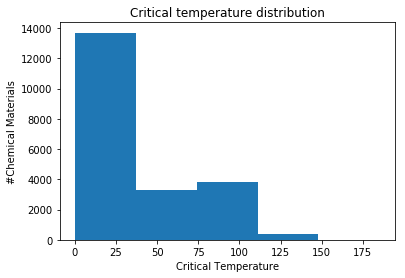

/home/jmcgrath/.local/lib/python3.5/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


NameError: name 'df' is not defined

In [8]:
#Accompanying visuals - Ensure all graph's are titled and axes labeled
import matplotlib.pyplot as plt
data = pd.read_csv('data/train.csv')
data = pd.DataFrame(data)
#Summary statistics
#Target variables
#Double [[]] wrapping ensure stays as pandas dataframe
targData=data[['critical_temp']]
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(targData['critical_temp'],bins=5)
plt.title('Critical temperature distribution')
plt.xlabel('Critical Temperature')
plt.ylabel('#Chemical Materials')
plt.show()

#Visuals module - Look into this module for displaying data
#vs.distribution(targData['critical_temp'])

#Feature variables
#Dropping the target variables from the data-set
#featData=data.drop(['critical_temp'],axis=1)
#ScatterPlot
fig2=plt.figure
ax = fig.add_subplot(1,1,1)
ax.scatter(df['mean_atomic_mass'],df['mean_Valence'])
#featData.describe().transpose()
#Univariate visualization
#Bivariate/Multivariate visalisations
#Data clustering
#list(featData)


In [84]:
#Creation of benchmark linear SVM
#As suggested in Capstone Proposal feedback, it was propsed to create a
#benchmark model in order to guage how the models
#Importing required models from sklearn
from sklearn import svm
clf_svm=svm.SVR(C=1.0)
###Creating GridSearchCV Object
param_dict_clf_svm={"kernel":["linear","poly","rbf","sigmoid"],
                   "C":[1.0,0.67,0.33],
                   "epsilon":[0.1,0.2,0.3]}

#clf_svm_gsvObj=GridSearchCV(clf_svm,param_grid=param_dict_clf_svm,scoring='mean_squared_error')
#Fiting the GridSearchCV Object to the training data
#trainer(X_train_true,y_train_true,clf_svm_gsvObj,[])
print(clf_svm_gsvObj.best_estimator_)

#Training the model
print("Training the model on the Training Data-set")
#trainer(X_train_true,y_train_true,clf_svm_gsvObj.best_estimator_,[])
#Testing the model on the validation set
print("Running the model on the Validation Data-set")
testFunc(y_test_val,X_test_val,clf_svm_gsvObj.best_estimator_)
#Testing the model on the test set
print("Running the model on the Testing Data-set")
testFunc(y_test,X_test,clf_svm_gsvObj.best_estimator_)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Training the model on the Training Data-set
Running the model on the Validation Data-set
Time taken to predict results - 4.918168783187866
R^2 Score is 0.6352534166537072
MSE Score is 433.25059600729566
Running the model on the Testing Data-set
Time taken to predict results - 5.846683979034424
R^2 Score is 0.6590039664718452
MSE Score is 392.5138690615133


In [ ]:
#Importing required models from sklearn
from numpy.core.umath_tests import inner1d
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
#Model parameter evaluation functions
from sklearn.model_selection import GridSearchCV
#Training the models
#Random Forest
clf_rf=RandomForestRegressor(n_estimators=1000,max_depth=15,random_state=42)

###Creating GridSearchCV Object
param_dict_clf_rf={"max_depth":[5,10,15,20,30,40],
                  "criterion":["mse","mae"],
                  "n_estimators":[1000,1500,3000],
                  "min_samples_split":[1.0,2,3]}

clf_svm_clf_rf=GridSearchCV(clf_rf,param_grid=param_dict_clf_rf,scoring='mean_squared_error')
#Fiting the GridSearchCV Object to the training data
trainer(X_train_true,y_train_true,clf_svm_clf_rf,[])
print(clf_svm_clf_rf.best_estimator_)


#Training the model
print("Training the model on the Training Data-set")
trainer(model_select_RFECV.transform(X_train_true),y_train_true,clf_svm_clf_rf.best_estimator_,[])
#Testing the model on the validation set
print("Running the model on the Validation Data-set")
testFunc(y_test_val,model_select_RFECV.transform(X_test_val),clf_svm_clf_rf.best_estimator_)
#Testing the model on the test set
print("Running the model on the Testing Data-set")
testFunc(y_test,model_select_RFECV.transform(X_test),clf_svm_clf_rf.best_estimator_)

/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be remo

/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be remo

/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/jmcgrath/.local/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y 

In [55]:
#Neural Network
from sklearn import preprocessing
from keras import models
from keras import layers
# Start neural network
##https://chrisalbon.com/deep_learning/keras/feedforward_neural_network_for_regression/
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
##Input layer##
network.add(layers.Dense(units=256, activation='relu', input_shape=(model_select_RFECV.transform(X_train).shape[1],)))

##Hiden layers##
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=128, activation='relu'))
network.add(layers.Dropout(0.15))
network.add(layers.Dense(units=32, activation='relu'))
network.add(layers.Dropout(0.25))

##Output layer##
# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))

##Compile the model##
network.compile(loss='mse',optimizer='Adam')

##Summary of the Model Archtecture##
network.summary()
##Fitting the model to the training data-set##
#Training the model
print("Training the model on the Training Data-set")
#network.fit(model_select_RFECV.transform(X_train), y_train_true, epochs=200,batch_size=256)
#addParams=[epochs=200,batch_size=256]
addParams={'epochs':200 , 'batch_size':256}

trainer(model_select_RFECV.transform(X_train_true),y_train_true,network,epochs=200,batch_size=256)
#Testing the model on the validation set
print("Running the model on the Validation Data-set")
testFunc(y_test_val,model_select_RFECV.transform(X_test_val),network)
#Testing the model on the test set
print("Running the model on the Testing Data-set")
testFunc(y_test,model_select_RFECV.transform(X_test),network)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               4352      
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 33        
Total params: 41,409
Trainable params: 41,409
Non-trainable params: 0
_________________________________________________________________
Traini

TypeError: trainer() got an unexpected keyword argument 'epochs'

In [ ]:
#Evaluating the final results
#Accuracy - Comparsion to benchmark models